In [16]:
# Iowa house prices predition
# competition link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

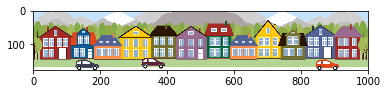

In [19]:
img = mpimg.imread('housesbanner.png')
imgplot = plt.imshow(img)
plt.show()